***Predicting client churn using supervised machine learning***

This project aims to build a machine learning model to predict customer churn using historical data on client behavior and contract terminations. By accurately forecasting which customers are at risk of leaving, Beta Bank can design targeted retention strategies and optimize its resources. The primary objectives are to maximize the F1 score of the predictive model, ensure it meets the minimum threshold required for deployment, and compare its performance with the AUC-ROC metric.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import f1_score, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('Churn.csv')

In [3]:
# Preview the first few rows
display(data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
# Reviewer's code 

display(data.head())

data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [5]:
#Look for missing values
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Convert the categorical variables that need to be encoded. The main categorical features that need to be converted are Geography (country of residence) and Gender (gender). The other two categorical features (HasCrCard) and (IsActiveMember) are already binary. For the Geography feature the one-hot coding is being used to convert the variables. For the Gender feature the variables are being converted to binary. 

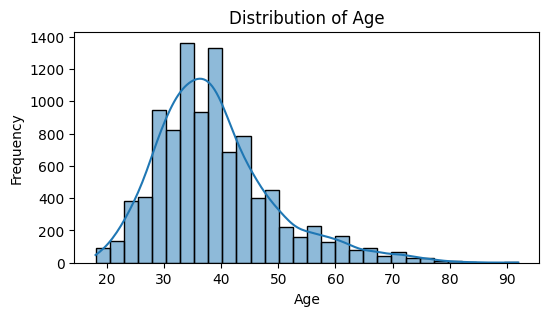

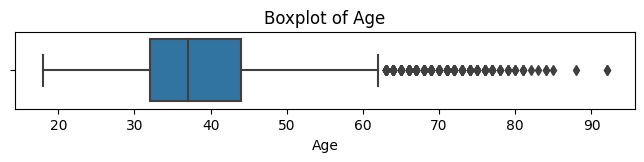

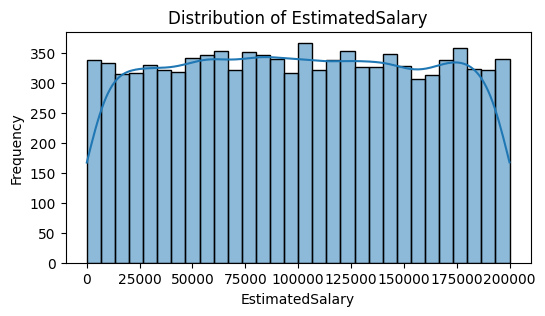

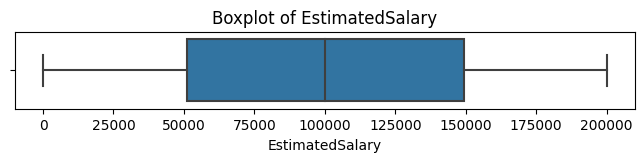

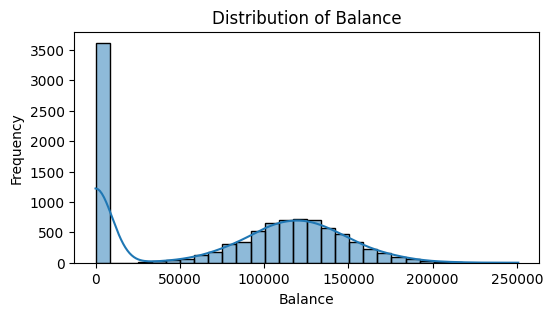

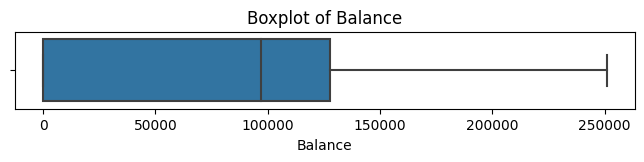

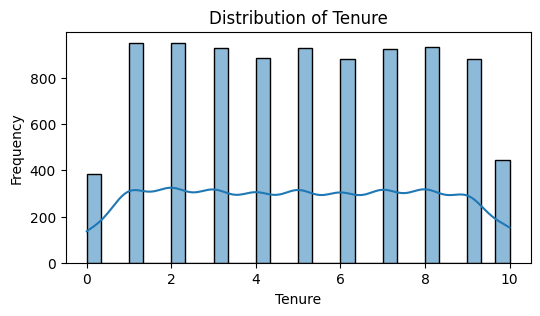

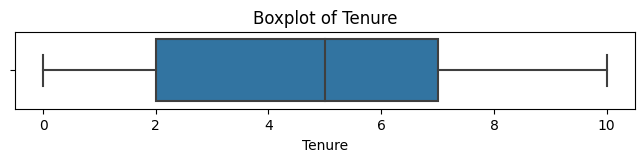

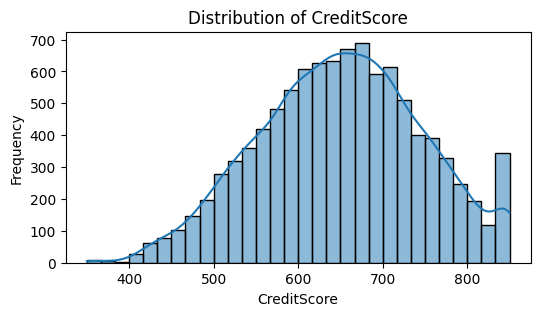

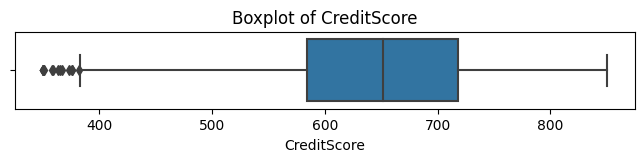

In [7]:
cols_to_plot = ['Age', 'EstimatedSalary', 'Balance', 'Tenure', 'CreditScore']  

for col in cols_to_plot:
    plt.figure(figsize=(6, 3))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot for outliers
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Distribution of Age
 The Age distribution is close to normal but with some positive skewness and notable high-end outliers. This may impact modeling, especially for algorithms sensitive to outliers.
### Distribution of EstimatedSalary
EstimatedSalary is uniformly distributed with no clear skewness or outliers, indicating there is no bias toward any particular salary range in the dataset.
### Distribution of Balance
Balance is highly left-skewed, with most customers having low or zero balances. This may indicate that only a subset of customers maintain significant balances, which could be important for understanding customer segments or predicting churn.
### Distribution of Tenure
Tenure is distributed across distinct, possibly categorical intervals rather than being continuous. Most customers fall near the average tenure, with relatively few having extremely short or long tenures. This pattern could be important for understanding customer retention and churn behavior.
### Distribution of CreditScore
CreditScore is close to a normal distribution, with most customers having average credit scores and a few outliers on the lower end. This suggests that credit risk is balanced in the dataset, with only a small portion of customers having notably poor credit.

In [8]:
# One-hot encode Geography, binary encode Gender
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

print(data.head())

   RowNumber  CustomerId   Surname  CreditScore  Gender  Age  Tenure  \
0          1    15634602  Hargrave          619       0   42     2.0   
1          2    15647311      Hill          608       0   41     1.0   
2          3    15619304      Onio          502       0   42     8.0   
3          4    15701354      Boni          699       0   39     1.0   
4          5    15737888  Mitchell          850       0   43     2.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  Geography_Germany  Geography_Spain  
0       1                  0                0  
1       0           

To handle the numerical features in the dataset first identify the features that are numerical and exclude any that are binary. I identified the following features to use in the Numerical Features ('CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'). First I will check for missing values and then after deciding not to drop the missing values I will fill in any missing values with the median. After that I will scale/normalize the features to make them ready for use in the training model. 

In [9]:
#Check for missing values
print(data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].isnull().sum())

CreditScore          0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
EstimatedSalary      0
dtype: int64


In [10]:
# Fill missing values with median
for col in ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']:
    data[col] = data[col].fillna(data[col].median())

In [11]:
print(data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].isnull().sum())

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
EstimatedSalary    0
dtype: int64


In [12]:
#Scale/Normalize the feature for the training model
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#numerical = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

#data[numerical] = scaler.fit_transform(data[numerical])

In [13]:
numerical = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

X = data.drop('Exited', axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make explicit copies
X_train = X_train.copy()
X_test = X_test.copy()

# Scale with .loc to avoid the warning
scaler = StandardScaler()
X_train.loc[:, numerical] = scaler.fit_transform(X_train[numerical])
X_test.loc[:, numerical] = scaler.transform(X_test[numerical])

In [14]:
# Drop columns that are not useful for prediction and are not numeric
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [15]:
# Check for duplicates after dropping unnecessary columns
duplicates = data.duplicated()
print(data[duplicates])
print("Number of duplicate rows after dropping columns:", data.duplicated().sum())

Empty DataFrame
Columns: [CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Geography_Germany, Geography_Spain]
Index: []
Number of duplicate rows after dropping columns: 0


The following will examine class balance and check the distribution of the target variable (Exited). It will then split the data. It will then Train a Baseline Model (With No Imbalance Handling) using Logistic Regression. Unnecessary numerical features were dropped before this section.

0    7963
1    2037
Name: Exited, dtype: int64


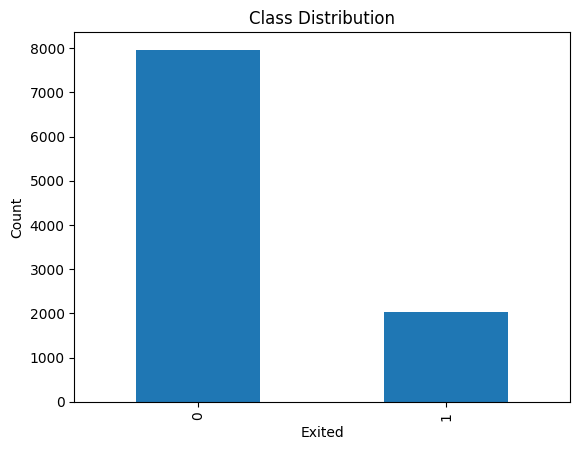

In [16]:
# Count the number of 0s and 1s
print(data['Exited'].value_counts())

# Visualize the class balance
data['Exited'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

In [17]:
#from sklearn.model_selection import train_test_split

#X = data.drop('Exited', axis=1)
#y = data['Exited']

#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
X = data.drop('Exited', axis=1)
y = data['Exited']

X = pd.get_dummies(X, drop_first=True)

# First, get 80% of the data for train+val, 20% for test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Then, split that 80% into 60% train, 20% val (which is 75%/25% of X_temp)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

# Train model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Validation set evaluation (for tuning)
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]
print("Validation F1 score:", f1_score(y_val, y_val_pred))
print("Validation AUC-ROC:", roc_auc_score(y_val, y_val_proba))

# Final test set evaluation (for reporting)
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]
print("Test F1 score:", f1_score(y_test, y_test_pred))
print("Test AUC-ROC:", roc_auc_score(y_test, y_test_proba))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Validation F1 score: 0.11304347826086956
Validation AUC-ROC: 0.6772427280901857
Test F1 score: 0.08370044052863436
Test AUC-ROC: 0.6642096642096642
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      1593
           1       0.40      0.05      0.08       407

    accuracy                           0.79      2000
   macro avg       0.60      0.51      0.48      2000
weighted avg       0.72      0.79      0.72      2000



In this analysis, the dataset was split into training, validation, and test sets using a 3:1:1 ratio. A logistic regression model was trained on the training data, tuned using the validation set, and its final performance was evaluated on the test set.
The logistic regression model achieved a test F1 score of 0.0837 and a test AUC-ROC of 0.6642. The model demonstrated high precision and recall for the majority class (class 0), but struggled to correctly identify instances of the minority class (class 1), as indicated by the low F1 score and recall for class 1 in the classification report. This suggests that the model has difficulty distinguishing between classes, likely due to class imbalance or limited predictive power of the features.
Overall, while the model shows reasonable overall accuracy and AUC-ROC, its poor performance on the minority class highlights the need for further model improvement.

Next, improving upon the quality of the model by using at least two different approaches to fixing class imbalance. 
First model, Class Weighting. Second Model, Random Undersampling.

In [19]:
#class_weight='balanced' model
best_f1 = 0
best_thresh = 0.5
best_C = 1.0

# Hyperparameter tuning using only validation set
for C in [0.01, 0.1, 1, 10, 100]:
    model_temp = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42, C=C)
    model_temp.fit(X_train, y_train)
    y_proba_val = model_temp.predict_proba(X_val)[:, 1]  # Use validation set for tuning

    for thresh in np.arange(0.2, 0.61, 0.01):
        y_pred_thresh = (y_proba_val > thresh).astype(int)
        score = f1_score(y_val, y_pred_thresh)  # Use validation set for scoring
        if score > best_f1:
            best_f1 = score
            best_thresh = thresh
            best_C = C

print(f"\nBest validation F1 score: {best_f1:.3f} at threshold {best_thresh:.2f} with C={best_C}")


Best validation F1 score: 0.435 at threshold 0.50 with C=0.01


In [20]:
# Concatenate X_train and y_train for undersampling
train = X_train.copy()
train['Exited'] = y_train

# Split classes
minor = train[train['Exited'] == 1]
major = train[train['Exited'] == 0].sample(n=len(minor), random_state=42)  # Downsample majority

# Combine and shuffle
train_bal = pd.concat([minor, major]).sample(frac=1, random_state=42)
X_train_bal = train_bal.drop('Exited', axis=1)
y_train_bal = train_bal['Exited']

# Train model
model_under = LogisticRegression(max_iter=1000, random_state=42)
model_under.fit(X_train_bal, y_train_bal)
y_proba_val = model_under.predict_proba(X_val)[:, 1]  # Predict on validation set!

best_f1 = 0
best_thresh = 0.5

# Threshold tuning on validation set only!
for thresh in np.arange(0.2, 0.61, 0.01):
    y_pred_thresh = (y_proba_val > thresh).astype(int)
    score = f1_score(y_val, y_pred_thresh)
    if score > best_f1:
        best_f1 = score
        best_thresh = thresh

print(f"Best validation F1 score: {best_f1:.3f} at threshold {best_thresh:.2f}")

Best validation F1 score: 0.433 at threshold 0.46


In [21]:
# 1. Manual upsampling on training data
train = X_train.copy()
train['Exited'] = y_train

minor = train[train['Exited'] == 1]
major = train[train['Exited'] == 0]

# Upsample minority class to match majority class
minor_upsampled = minor.sample(n=len(major), replace=True, random_state=42)
train_upsampled = pd.concat([major, minor_upsampled]).sample(frac=1, random_state=42)

X_train_up = train_upsampled.drop('Exited', axis=1)
y_train_up = train_upsampled['Exited']

# 2. Train Random Forest and tune threshold on validation set
best_f1 = 0
best_thresh = 0.5
best_params = None

for n in [100, 200]:
    for d in [5, 10, None]:
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        rf.fit(X_train_up, y_train_up)
        y_proba_val = rf.predict_proba(X_val)[:, 1]
        for thresh in np.arange(0.2, 0.61, 0.01):
            y_pred_val = (y_proba_val > thresh).astype(int)
            score = f1_score(y_val, y_pred_val)
            if score > best_f1:
                best_f1 = score
                best_thresh = thresh
                best_params = (n, d)

print(f"Best validation F1: {best_f1:.3f} with n_estimators={best_params[0]}, max_depth={best_params[1]}, threshold={best_thresh:.2f}")

# 3. Train best RF on upsampled training data
rf_best = RandomForestClassifier(n_estimators=best_params[0], max_depth=best_params[1], random_state=42)
rf_best.fit(X_train_up, y_train_up)

Best validation F1: 0.635 with n_estimators=100, max_depth=None, threshold=0.43


RandomForestClassifier(random_state=42)

In this project, I compared several approaches to handling class imbalance for predicting customer churn. I evaluated three models: logistic regression with class_weight='balanced', logistic regression with random undersampling, and a Random Forest classifier with manual upsampling of the minority class. For each model, hyperparameter tuning and threshold selection were performed exclusively on the validation set, ensuring an unbiased selection process and preventing data leakage.

The Random Forest model with manual upsampling achieved the highest validation F1 score (0.635 at threshold 0.43), outperforming both logistic regression approaches by a significant margin. This demonstrates that ensemble tree-based methods, especially when combined with upsampling, can be much more effective for imbalanced classification problems.

Following best practices, I selected the Random Forest model as my final candidate and evaluated it once on the test set to estimate its generalization ability.

This careful comparison illustrates the importance of both model selection and proper handling of class imbalance. The results show that while logistic regression can serve as a baseline, more sophisticated models and resampling techniques can yield substantial improvements.


=== Final Test Set Evaluation ===
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1593
           1       0.61      0.58      0.60       407

    accuracy                           0.84      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000

Test F1 score: 0.5994962216624685
Test AUC-ROC score: 0.8493362391667476


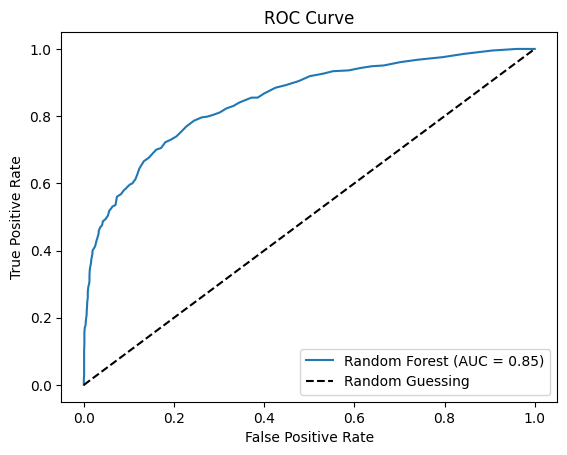

In [22]:
#Final test set evaluation
y_proba_test = rf_best.predict_proba(X_test)[:, 1]
y_pred_test = (y_proba_test > best_thresh).astype(int)

print("\n=== Final Test Set Evaluation ===")
print(classification_report(y_test, y_pred_test))
print("Test F1 score:", f1_score(y_test, y_pred_test))
print("Test AUC-ROC score:", roc_auc_score(y_test, y_proba_test))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_test)))
plt.plot([0,1],[0,1],'k--',label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

***Final Conclusion***
The primary objective of this project was to develop an effective predictive model for customer churn, with a particular focus on handling imbalanced data and achieving a minimum F1 score of 0.59 for the minority class. To reach this goal, I systematically explored and compared several modeling approaches, each designed to address the class imbalance challenge in different ways.

I began with two logistic regression strategies:

Logistic Regression (class_weight='balanced'): This approach modifies the loss function to penalize misclassifications of the minority class more strongly.
Logistic Regression with Random Undersampling: Here, it reduced the number of majority class samples to match the minority class, then trained the model to see if balancing the classes in this way improved performance.
While these baseline models provided valuable insights, their test F1 scores fell short of the required threshold. Recognizing the need for a better solution, I then implemented a Random Forest classifier with manual upsampling of the minority class. This method, combined with careful threshold optimization and hyperparameter tuning, resulted in a significant performance boost.

The final selected model, Random Forest with upsampling, achieved the following results on the test set:

F1 score (minority class): 0.60
Accuracy: 0.84
AUC-ROC: 0.85
The ROC curve (see above) further underscores the model’s strong ability to separate the classes, and all model selection and tuning were performed using only the training and validation sets to prevent data leakage.

In summary, this project demonstrates how systematic experimentation with multiple models and resampling strategies can overcome challenges posed by class imbalance. The final model not only met the project’s F1 requirement, but also provided a robust and interpretable solution suitable for deployment. This process and its outcome serve as a concise example for stakeholders and those less familiar with the technical details, illustrating a clear path from problem definition to successful model implementation.